# PRÁTICA GUIADA: Regressão Linear I.

1.Introdução ao conjunto de dados "bikeshare.csv" 

* Leitura dos dados
* Visualização dos dados

2.Regressão linear
* Forma de regressão linear
* Construção do modelo de regressão linear
* Uso do modelo para previsão
* É importante a escala das features?

3.Trabalho com múltiplas features
* Visualização dos dados (parte 2)
* Acrescentamento de features ao modelo

4.Escolha entre modelos
* Seleção de features
* Métricas de avaliação para problemas de regressão
* Comparação de modelos com sets de treinamento/teste e RMSE
* Comparação de RMSE de teste com RMSE nulo (baseline)
       
5.Criação de features
* Gestão de features categóricas
* Engenharia de features   

**===========================================================================================**

### 1.1 Importação de dados

Vamos trabalhar com um conjunto de dados sobre aluguéis de bicicletas que foi utilizado em um concurso de Kaggle


São fornecidos dados sobre aluguéis por hora que abrangem dois anos. O conjunto de treinamento abrange os primeiros 19 dias de cada mês e o conjunto de teste vai do dia 20 até o fim do mês. **_Queremos projetar o número total de bicicletas alugadas durante cada hora coberta pelo conjunto do teste, utilizando apenas as informações disponíveis no teste de treinamento._**


**CAMPOS DO SET**

**datetime** - hourly date + timestamp

**season** - 1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 

1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds <br/>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals


#### Vamos começar importando a biblioteca Pandas e lendo o arquivo `'bikeshare.csv'` com a função [`.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), observando os parâmetros `index_col = 'datetime'` para usarmos a coluna `'datetime'` como índice do dataframe  e `parse_dates = True` para a análise dos índices.

In [1]:
# Lemos os dados e configuramos o datetime como índice.
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', 
                    index_col = 'datetime', 
                    parse_dates = True)

####  <span style = "color:red">Código Original.</span>
<!---
# Lemos os dados e configuramos o datetime como índice.
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', 
                    index_col = 'datetime', 
                    parse_dates = True)
-->

#### Vamos observar as primeiras linhas dez linahs do dataframe `bikes`. 

In [2]:
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


####  <span style = "color:red">Código Original.</span>
<!---
bikes.head(10)
-->

**Perguntas:**

* O que cada observação representa?
* Qual a variável de resposta (conforme definido por Kaggle)?
* Quantas variáveis há?

#### Vamos renomear a coluna `'count'` com o nome `'total'`  com o métodp [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) e checar novamente as dez primeiras linhas, observe o parâmetro  `inplace = True`, para gravar a modificação.

In [3]:
# Precisamente “count” é um método de Pandas, portanto convém renomear a coluna
bikes.rename(columns = {'count':'total'}, inplace = True)
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


####  <span style = "color:red">Código Original.</span>
<!---
# Precisamente “count” é um método de Pandas, portanto convém renomear a coluna
bikes.rename(columns = {'count':'total'}, inplace = True)
bikes.head(10)
-->

### 1.2 Visualização

#### Uma vez executadas as primeiras alterações, vamos visualizar a relação entre alguns atributos, comecemos por importar as bibliotecas:
- [`seaborn`](https://seaborn.pydata.org/);
- [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html). 

#### Vamos definir alguns parâmetros globais para o 'matplotlib', como [plt.rcParams](https://matplotlib.org/tutorials/introductory/customizing.html#matplotlib-rcparams), podemos fazer `['figure.figsize'] = (8, 6)` e `['font.size'] = 14`. A sigla [(`rc`)](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html) significa `runtime configuration`.

#### Não esqueça de definir a [função mágica](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) [`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) para a geração de plots abaixo das células que os geram.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parâmetros globais para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

####  <span style = "color:red">Código Original.</span>
<!---
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parâmetros globais para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
-->

#### Podemos agora plotar o dataset `bikes` com o auxílio do método [`.plot()`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). Observe o conjunto de parâmetros `kind = 'scatter'`, para uma dispersão enrtre as variáveis `x = 'temp'` e `y = 'total'`, considerando  `alpha = 0.2` para definir a transparência dos pontos.

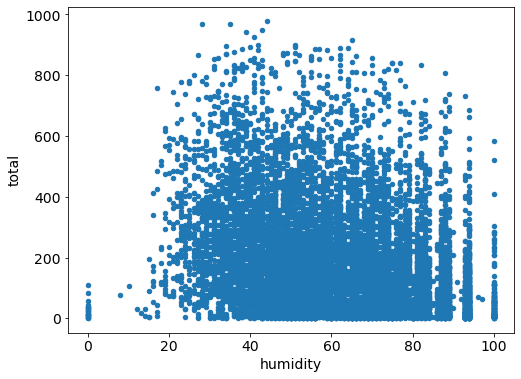

In [5]:
# Plotamos pontos com Pandas
bikes.plot(kind = 'scatter', 
           x = 'humidity', 
           y = 'total'
          );

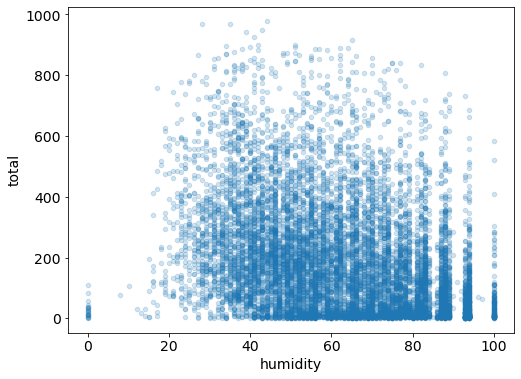

In [7]:
# Plotamos pontos com Pandas
bikes.plot(kind = 'scatter', 
           x = 'humidity', 
           y = 'total', 
           alpha = 0.2
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Plotamos pontos com Pandas
bikes.plot(kind = 'scatter', 
           x = 'temp', 
           y = 'total', 
           alpha = 0.2
          );
-->

#### Vamos repetir o gráfico anterior, porém agora aplicando uma regressão implícita, usando o método [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). Observe os parâmetros 

#### Para os atributos `x = 'temp'` e `y = 'total'`, do conjunto de dados `data = bikes`, com proporção da eixos `aspect = 1.41` e transparência de pontos `scatter_kws = {'alpha': 0.2}`.

C:\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


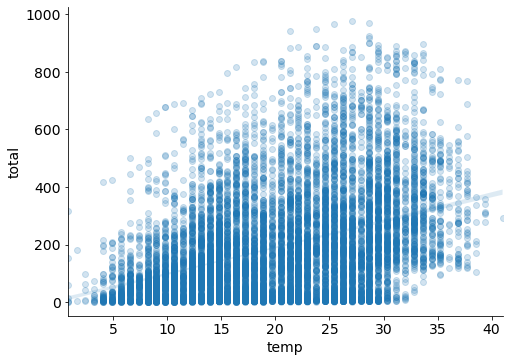

In [8]:
sns.lmplot(x = 'temp', 
           y = 'total', 
           data = bikes, 
           aspect = 1.41, 
           scatter_kws = {'alpha': 0.2}
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Ajuste com Seaborn (modelo linear) 
sns.lmplot(x = 'temp', 
           y = 'total', 
           data = bikes, 
           aspect = 1.41, 
           scatter_kws = {'alpha': 0.2}
          );
--> 

## 2. Revisão: forma do modelo linear

A seguir temos uma relação entre uma variávei dependente 'y' e múltimas variáveis independentes '$x_{i}$', multiplicando os coeficientes angulares $\beta_{i}$ somados ao coeficiente linear $\beta_{0}$, que intercepta o eixo $y_{x=0}$. 

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

<img src="multiple_linear.png" width="1402" height="670" align="center"/>

#### Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério ** mínimos quadrados **.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição ** de quadrados de resíduos ** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.

<img src="linearReg.png" width="1000" height="560" align="center"/>

#### No diagrama anterior:

- Os pontos azuis são os ** valores observados ** de x e y.
- A linha vermelha é nossa ** linha de mínimos quadrados **.
- As linhas tracejadas azuis são os ** resíduos **, que são as distâncias verticais entre os valores observados y a linha de mínimos quadrados.

## 3. Construção do modelo de regressão linear

#### Vamos começar a modelar nossos dados com o atributo `'temp'` de nosso dataframe `bikes`. Vamos criar um objeto `X` para receber a coluna `bikes['temp']` e um objeto `y` para receber a coluna `bikes['total']`.

In [9]:
# Criamos X e y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['total']
#print(X)
#print(y)

####  <span style = "color:red">Código Original.</span>
<!---
# Criamos X e y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['total']
print(X)
print(y)
-->

#### Agora importamos a biblioteca [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Vamos também instanciar um objeto chamado `linreg` para receber o modelo de regressão linear que vamos aplicar com a função [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### Assim que o modelo é instanciado já é possível submetê-lo ao ajuste, com o auxílio da função [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) para os pares `(X, y)`.

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
-->

#### Podemos imprimir os coeficientes angulares [`.coef_`](https://scikit-learn.org/stable/modules/linear_model.html) e linear [`.intercept_`](https://scikit-learn.org/stable/modules/linear_model.html).

In [11]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616781
[9.17054048]


####  <span style = "color:red">Código Original.</span>
<!---
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)
-->

#### Interpretação do parâmetro de ** intercepção ** ($\beta_0$):

- É o valor de $ y $ quando $ x $ = 0.
- Portanto, é o número estimado de aluguéis quando a temperatura é de 0 graus Celsius.
- ** Obs.: ** Nem sempre faz sentido interpretar a intercepção. (Por quê?)

#### Interpretação do coeficiente de ** "temp" ** ($\beta_{i} = \frac{\Delta y_{i}}{\Delta X_{i}}$):

- É a mudança em $ y $ dividida pela mudança em $ x $, ou a "inclinação".
- Assim, um aumento da temperatura de 1 grau Celsius é ** ligado a ** um aumento de aluguéis de 9,17 bicicletas.
- Não se trata de uma declaração de causalidade.
- $ \beta_1 $ seria ** negativo ** se um aumento na temperatura fosse ligado a uma ** diminuição** nos aluguéis.

## 4. Uso do modelo para previsão.

#### Quantos aluguéis de bicicletas nós poderíamos prever se a temperatura fosse de 25 graus Celsius?

In [12]:
# Aplicando a fórmula manualmente
a = linreg.intercept_
b = linreg.coef_
xvalue = 25
#yvalue = linreg.intercept_ + linreg.coef_* xvalue
yvalue =  a + b * xvalue
print(yvalue)

[235.309725]


####  <span style = "color:red">Código Original.</span>
<!---
# Aplicando a fórmula manualmente
yvalue = linreg.intercept_ + linreg.coef_* (25)
print(yvalue)
-->

#### Acima fizemos o cálculo da equação $ \hat{y} = a + b X$, abaixo vamos importar o pacote [`numpy`](https://numpy.org/) e prever o valor de saída `yvalue` para a temperatura `xvalue`, com a ajuda da função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict). 

#### Para isso será necessário gerar um  arranjo `numpy` com o método [`.array`](https://numpy.org/doc/1.18/reference/generated/numpy.array.html) aplicado ao valor `xvalue` e inverter sua forma com a função [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html). 

In [13]:
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)

array([235.309725])

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)
-->

## 5. A escala das features é importante?

#### Vamos supor que a temperatura foi medida em graus `Fahrenheit` em vez de Celsius. Como isso afeta o modelo? Vamos [converter](https://www.rapidtables.com/convert/temperature/how-celsius-to-fahrenheit.html) a temperatura em `Celcius` para essa nova unidade.

In [14]:
# Criamos uma nova coluna para a temperatura em Fahrenheit
# ℃ = (℉ - 32)/1.8
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


####  <span style = "color:red">Código Original.</span>
<!---
# Criamos uma nova coluna para a temperatura em Fahrenheit
# ℃ = (℉ - 32)/1.8
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()
-->

#### Vamos plotar o total de bikes alugadas em função da nova coluna de temperatura, usando novamente a função `.lmplot`. 

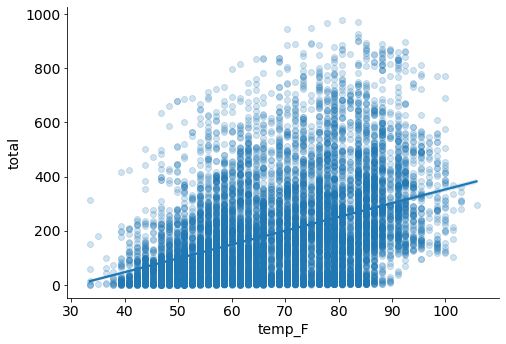

In [27]:
# Ajustamos novamente com Seaborn 
sns.lmplot(x = 'temp_F', 
           y = 'total', 
           data = bikes, 
           aspect = 1.45, 
           scatter_kws = {'alpha':0.2}
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos novamente com Seaborn 
sns.lmplot(x = 'temp_F', 
           y = 'total', 
           data = bikes, 
           aspect = 1.45, 
           scatter_kws = {'alpha':0.2}
          );
-->

#### Se repetirmos o processo anterior, de separação de um atributo independente e do atributo target, instanciarmos um modelo, aplicarmos a regressão linear, pelos ajustes, e imprimirmos os coeficientes, teremos:

In [28]:
# criamos novamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos o modelo e fitamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129445
[5.09474471]


####  <span style = "color:red">Código Original.</span>
<!---
# criamos novamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos o modelo e fitamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)
-->

#### Fizermos a conversão de temperatura $T_{Celcius} \rightarrow T_{Fahrenheit}$.

In [29]:
# Convertemos 25°C em °F
temp_C = 25
temp_F = temp_C * 1.8 + 32
temp_F

77.0

####  <span style = "color:red">Código Original.</span>
<!---
# Convertemos 25°C em °F
temp_C = 25
temp_F = temp_C * 1.8 + 32
-->

#### Recalculamos a função $y = a + b X$.

In [30]:
xvalue = temp_F
yvalue = linreg.intercept_ + linreg.coef_* xvalue
print(yvalue)

[235.309725]


####  <span style = "color:red">Código Original.</span>
<!---
xvalue = temp_F
yvalue = linreg.intercept_ + linreg.coef_* xvalue
print(yvalue)
-->

#### E aplicarmos novamente a função `.predict()`, teremos:

In [31]:
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)

array([235.309725])

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)
-->

#### E então, a que conclusão você chegou?

####  <span style = "color:red">Código Original.</span>
<!---
** Conclusão: ** A escala das características é ** irrelevante ** para os modelos de regressão linear. Ao mudarmos a escala, simplesmente alteramos nossa ** interpretação** dos coeficientes.
-->

#### Vamos remover a colunas `'temp_F'` com a função ['.drop()'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Observe os parãmetros `axis = 1`, `inplace = True`.

In [32]:
# apagamos a coluna temp_F 
bikes.drop('temp_F', 
           axis = 1, 
           inplace = True
          )

####  <span style = "color:red">Código Original.</span>
<!---
# apagamos a coluna temp_F 
bikes.drop('temp_F', 
           axis = 1, 
           inplace = True
          )
-->

####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->